In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import bidi.algorithm
import arabic_reshaper
import adhtools.utils

In [3]:
fpath = '/media/sf_VBox_Shared/Arabic/Analyses/topicmodelling/'

In [4]:
df_topics = pd.read_csv(os.path.join(fpath, 'fiqh_roots_topics_20_CL.csv'), index_col=0)
df_topics

,0,1,2,3,4,5,6,7,8,9,label
0,صحي,وبأ,عبر,شرح,ظهر,الخ,خلف,ذكر,غور,اه,noise
1,وقع,قعي,حوض,شهر,رجع,ثني,زوج,عدا,ثلث,طلق,marriage - divorce
2,خلف,ذكر,سأل,شفع,صحي,وجه,أبن,غور,روي,ثني,noise
3,وهب,بيع,سود,موت,حري,قوم,ملك,كتب,ولد,عتق,slaves
4,جرح,عمد,عقل,قوم,سرق,قصص,جني,قطع,ودي,قتل,crime and punishment
5,شرط,نفع,غصب,شرك,أرض,جور,مول,ملك,عمل,أجر,property - lands
6,عبر,علم,خبر,ذكر,عرف,خلف,سلم,ظهر,غور,عدم,noise
7,سحن,خلف,أخذ,كتب,شهب,غور,فلي,ملك,قسم,أبن,noise
8,خرج,كلم,سمي,نذر,دخل,كفر,أكل,حنث,يمن,حلف,noise
9,مول,بقي,خمس,موت,نصف,عشر,ربع,ورث,وصي,ثلث,inheritance


In [5]:
document_topics = pd.read_csv(os.path.join(fpath, 'fiqh_roots_document_topics_20.csv'), index_col=0).sort_index()
#df_topics = pd.read_csv(os.path.join(fpath, 'fiqh_roots_topics_20.csv'), index_col=0)
metadata = pd.read_csv(os.path.join(fpath, 'metadata.csv'), index_col=0)

In [6]:
metadata.to_csv(os.path.join(fpath, 'metadata.csv'))

In [7]:
#metadata = metadata.set_index('filename')

In [8]:
topic_names = df_topics['label']#df_topics['0'] +' '+ df_topics['1'] +' '+ df_topics['3']

In [9]:
# import glob
# book_files = glob.glob('/media/sf_VBox_Shared/Arabic/Fiqh/2018-11-13-Fiqh-stemmed-chapters/*.xml')
# c = adhtools.utils.corpus_wordlist(book_files, analyzer=False, field='proposed_root')
# chapter_lengths = {os.path.basename(b): len(l) for (b,l) in zip (book_files, c)}
# metadata['ChapterLength'] = pd.Series(chapter_lengths)

In [10]:
def split_fname(fname):
    splitted = fname.split('-')
    bookname = splitted[0]
    if len(splitted)>1:
        chapter = int(splitted[-1].split('.')[0])
    else:
        chapter = 0
    return (bookname, chapter)
fnames = document_topics.index
ind = pd.MultiIndex.from_tuples(document_topics.index.map(split_fname))
document_topics = document_topics.set_index(ind)
fnames_s = pd.Series(fnames, index=ind)

In [11]:
document_topics.head()

0         1         2         3         4  \
0179MalikIbnAnas.Muwatta 0  0.002902  0.000264  0.000264  0.000264  0.467282   
                         1  0.001923  0.021154  0.001923  0.001923  0.213462   
                         2  0.001786  0.001786  0.001786  0.001786  0.430357   
                         3  0.000741  0.000741  0.008148  0.000741  0.489630   
                         4  0.004044  0.004044  0.000368  0.000368  0.140074   

                                   5         6         7         8         9  \
0179MalikIbnAnas.Muwatta 0  0.000264  0.525330  0.000264  0.000264  0.000264   
                         1  0.001923  0.617308  0.001923  0.001923  0.001923   
                         2  0.001786  0.537500  0.001786  0.001786  0.001786   
                         3  0.000741  0.430370  0.000741  0.000741  0.000741   
                         4  0.000368  0.761397  0.000368  0.000368  0.000368   

                                  10        11        12        13        14  \
0179MalikIbnAnas.Muwatta 0  0.000264  0.000264  0.000264  0.000264  0.000264   
                         1  0.001923  0.001923  0.001923  0.001923  0.001923   
                         2  0.001786  0.001786  0.001786  0.001786  0.001786   
                         3  0.000741  0.000741  0.000741  0.000741  0.045185   
                         4  0.000368  0.000368  0.000368  0.000368  0.000368   

                                  15        16        17        18        19  
0179MalikIbnAnas.Muwatta 0  0.000264  0.000264  0.000264  0.000264  0.000264  
                         1  0.001923  0.117308  0.001923  0.001923  0.001923  
                         2  0.001786  0.001786  0.001786  0.001786  0.001786  
                         3  0.000741  0.008148  0.000741  0.008148  0.000741  
                         4  0.084926  0.000368  0.000368  0.000368  0.000368

In [12]:
fnames_s.name = 'filename'

In [13]:
metadata_newind = metadata.join(fnames_s.reset_index().set_index('filename')).set_index(['level_0', 'level_1'])

In [14]:
new_ind = []
book_names = sorted(ind.levels[0])
for book in book_names:
    new_ind.extend(list(range(len(document_topics.loc[book]))))
new_ind = pd.MultiIndex.from_tuples(zip(ind.get_level_values(0), new_ind))

In [15]:
largest_topics = document_topics.idxmax(axis=1)
largest_topics = pd.concat([largest_topics,  metadata_newind['ChapterLength'], metadata_newind['Number_of_tokens']], axis=1)
#largest_topics.index = new_ind
largest_topics = largest_topics.reset_index()
largest_topics.columns = ['book', 'chapter', 'topic', 'length', 'total_length']
book_dict = {b: i for i,b in enumerate(book_names)}

In [16]:
metadata_newind['topic'] = largest_topics.set_index(['book', 'chapter'])['topic']
metadata_newind['topic_name'] = [topic_names[int(topic)] for topic in metadata_newind['topic']]

In [17]:
metadata_newind.to_csv(os.path.join(fpath, 'chapters_metadata_topics.csv'))

In [18]:
largest_topics['x1'] = largest_topics.groupby('book')['length'].transform(pd.Series.cumsum)
largest_topics['x0'] = largest_topics['x1'] - largest_topics['length']

In [19]:
largest_topics['total_length'] = largest_topics.groupby('book')['x1'].transform(lambda l: [l.max()]*len(l))

In [20]:
largest_topics['perc0'] = largest_topics['x0'] / largest_topics['total_length']
largest_topics['perc1'] = largest_topics['x1'] / largest_topics['total_length']

In [21]:
largest_topics[650:660]

,book,chapter,topic,length,total_length,x1,x0,perc0,perc1
650,0179MalikIbnAnas.Muwatta,650,6,171,140946,140758,140587,0.997453,0.998666
651,0179MalikIbnAnas.Muwatta,651,6,33,140946,140791,140758,0.998666,0.998900
652,0179MalikIbnAnas.Muwatta,652,6,118,140946,140909,140791,0.998900,0.999737
653,0179MalikIbnAnas.Muwatta,653,6,37,140946,140946,140909,0.999737,1.000000
654,0182AbuYusufYacqub.Kharaj.xml,0,7,67701,67701,67701,0,0.000000,1.000000
655,0264IbnYahyaMuzani.Mukhtasar,0,0,170,175122,170,0,0.000000,0.000971
656,0264IbnYahyaMuzani.Mukhtasar,1,0,161,175122,331,170,0.000971,0.001890
657,0264IbnYahyaMuzani.Mukhtasar,2,0,48,175122,379,331,0.001890,0.002164
658,0264IbnYahyaMuzani.Mukhtasar,3,0,79,175122,458,379,0.002164,0.002615
659,0264IbnYahyaMuzani.Mukhtasar,4,0,672,175122,1130,458,0.002615,0.006453


In [22]:
largest_topics.to_csv(os.path.join(fpath, 'largest_topics_20.csv'), index=False)

In [72]:
#color_list = sns.color_palette(n_colors=len(topic_names))
color_list = sns.color_palette("muted", n_colors=10) + sns.color_palette("dark", n_colors=10)
color_dict = {label: color_list[i] for i,label in enumerate(topic_names)}
color_dict['noise'] = 'white'

In [73]:
import matplotlib.colors

def style_row(row):
    topic_id = int(row.name)
    topic_name = row.label
    color = matplotlib.colors.to_hex(color_dict[topic_name])
    attr = 'background-color: {}'.format(color)
    return [attr for v in  row]
df_topics.style.apply(style_row, axis=1)

,0,1,2,3,4,5,6,7,8,9,label
0,صحي,وبأ,عبر,شرح,ظهر,الخ,خلف,ذكر,غور,اه,noise
1,وقع,قعي,حوض,شهر,رجع,ثني,زوج,عدا,ثلث,طلق,marriage - divorce
2,خلف,ذكر,سأل,شفع,صحي,وجه,أبن,غور,روي,ثني,noise
3,وهب,بيع,سود,موت,حري,قوم,ملك,كتب,ولد,عتق,slaves
4,جرح,عمد,عقل,قوم,سرق,قصص,جني,قطع,ودي,قتل,crime and punishment
5,شرط,نفع,غصب,شرك,أرض,جور,مول,ملك,عمل,أجر,property - lands
6,عبر,علم,خبر,ذكر,عرف,خلف,سلم,ظهر,غور,عدم,noise
7,سحن,خلف,أخذ,كتب,شهب,غور,فلي,ملك,قسم,أبن,noise
8,خرج,كلم,سمي,نذر,دخل,كفر,أكل,حنث,يمن,حلف,noise
9,مول,بقي,خمس,موت,نصف,عشر,ربع,ورث,وصي,ثلث,inheritance


In [74]:
def plot_bar_per_book(largest_topics, xmin_col, xmax_col, book_names, topic_names, legend=True):
    book_dict = {b: i for i,b in enumerate(book_names)}

    plt.figure(figsize=(25, np.floor(len(book_names)*0.5)))
    ax = plt.gca()
    for topic in range(len(topic_names)):
        topic_name = topic_names[topic]
        largest_topics_sub = largest_topics[largest_topics['topic']==str(topic)]
        #color = color_list[topic] 
        color = color_dict[topic_name]

        y = [book_dict[s] for s in largest_topics_sub['book']]
        #x = largest_topics_sub['chapter']
        xmin = largest_topics_sub[xmin_col]
        xmax = largest_topics_sub[xmax_col]
        if topic_name != 'noise':
            ax.hlines(y, xmin, xmax, #marker='s', edgecolors=None, 
                      colors=np.array((color,)), lw=10,
                       label=bidi.algorithm.get_display(arabic_reshaper.reshape(topic_name)))
    ax.set_yticks(np.arange(len(book_dict)))
    ax.set_yticklabels(book_names)
    ax.set_xlim(0, largest_topics[xmax_col].max())
    ax.set_ylim(-0.5, len(book_names))
    if legend:
        plt.legend(fontsize='large')
    ax.invert_yaxis()
    ax.set_facecolor('black')
    plt.show()

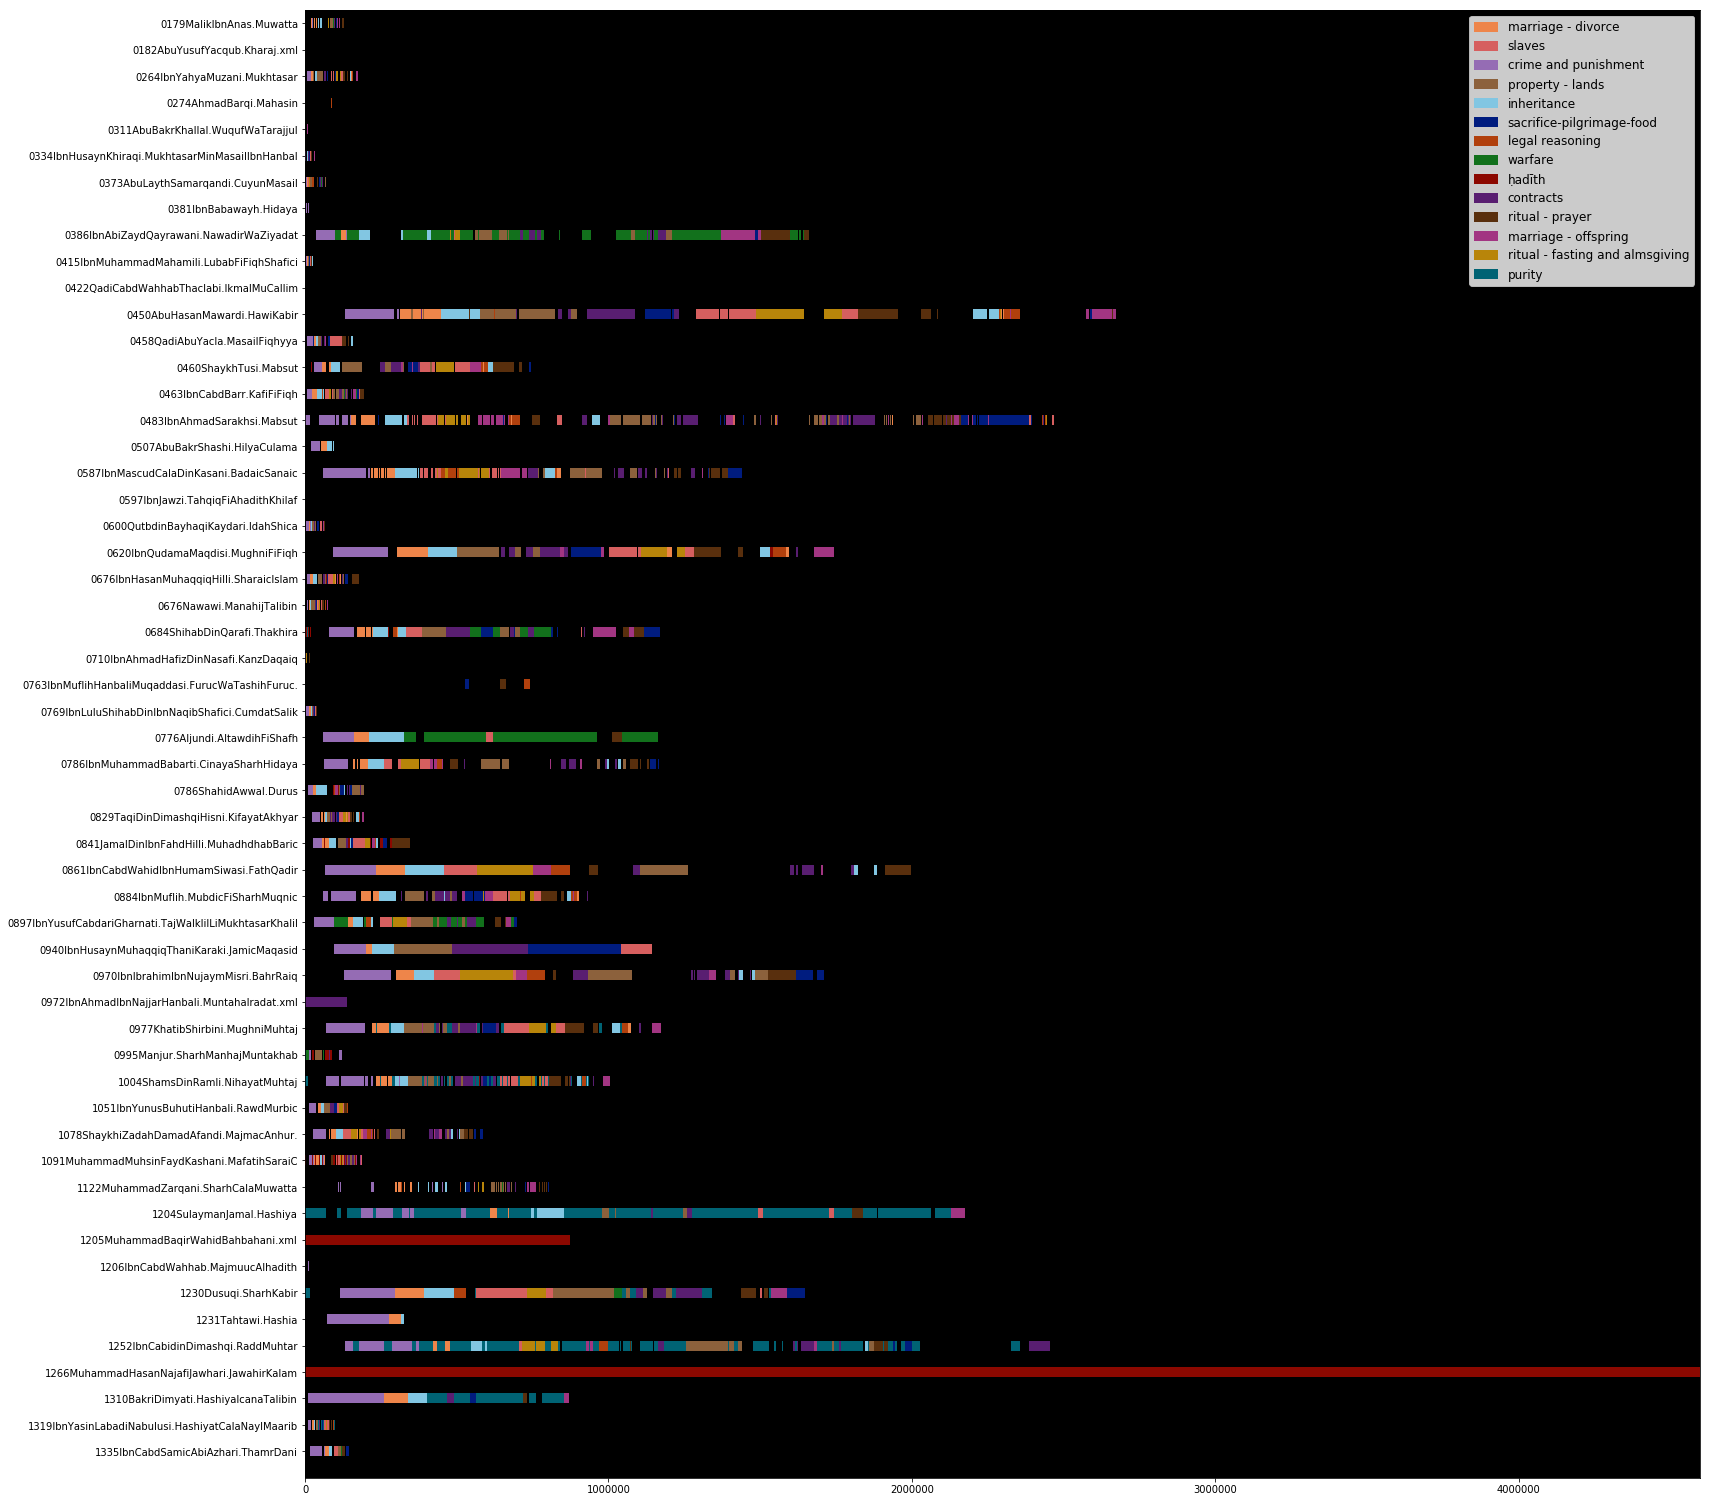

In [75]:
plot_bar_per_book(largest_topics, 'x0', 'x1', book_names, topic_names, legend=True)

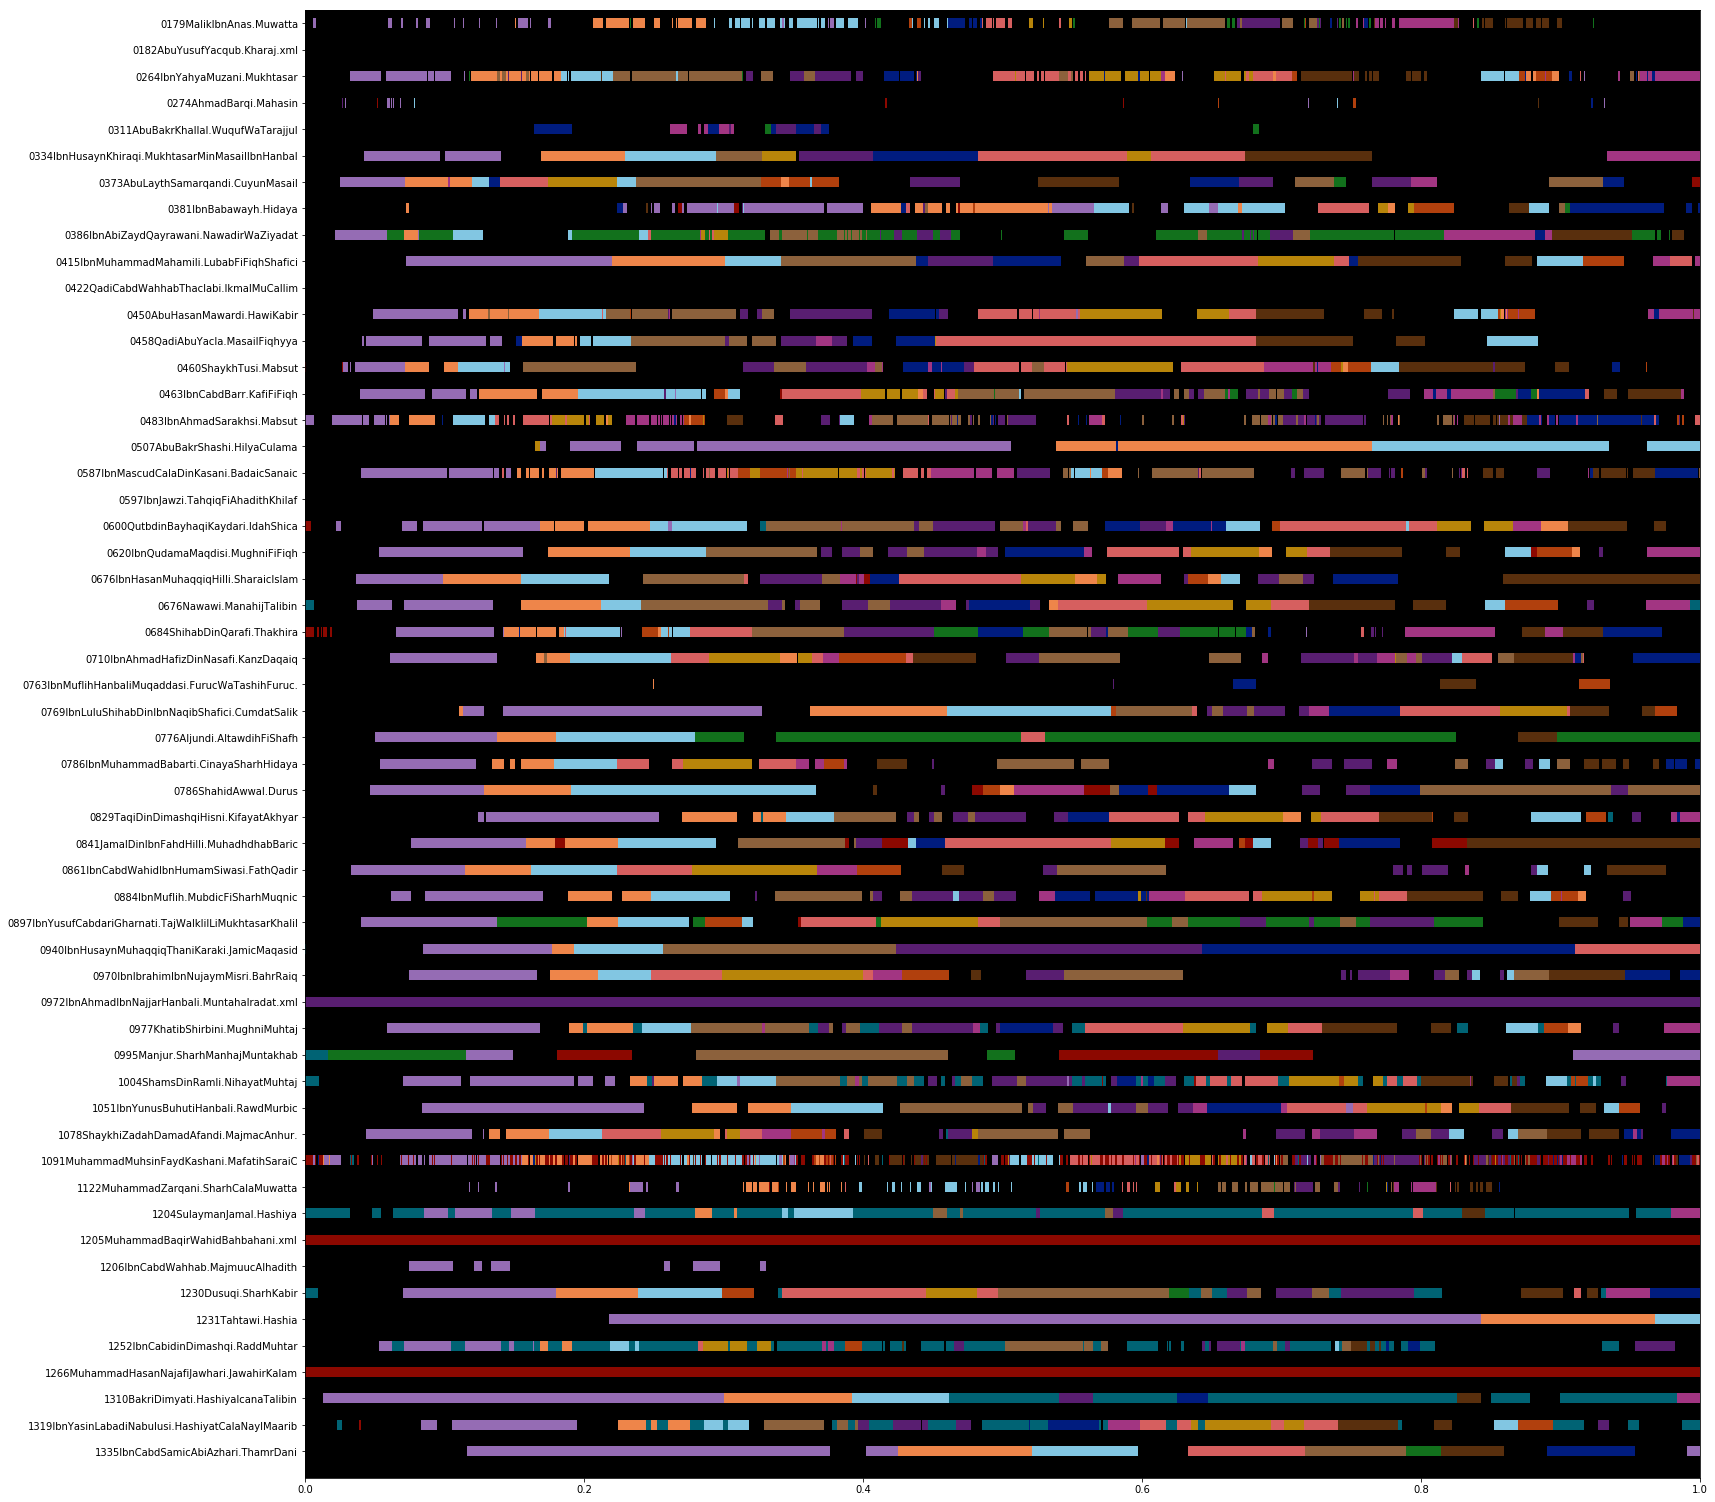

In [76]:
plot_bar_per_book(largest_topics, 'perc0', 'perc1', book_names, topic_names, legend=False)

مالكي


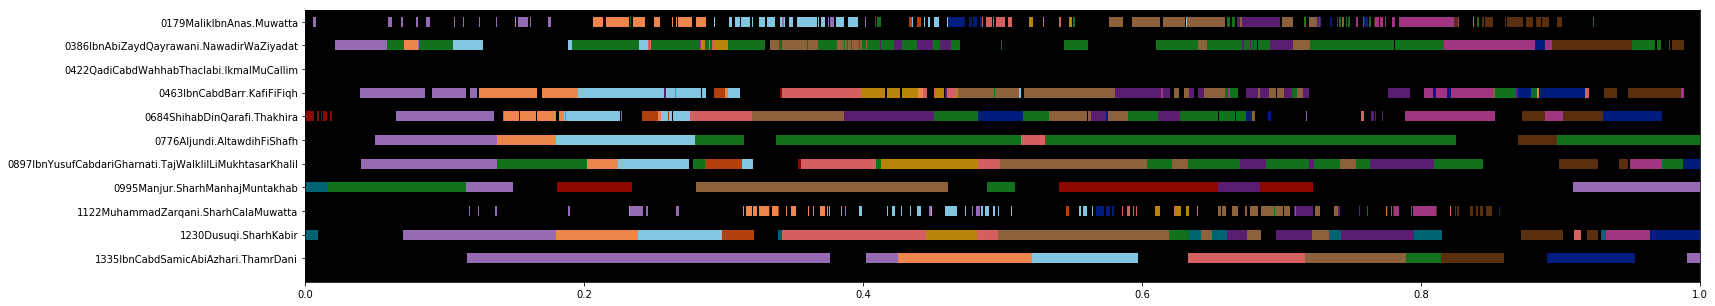

حنفي


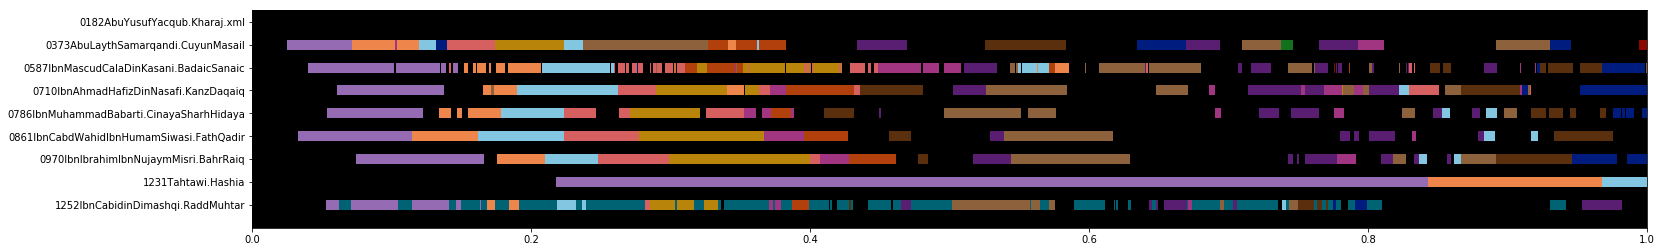

شافعي


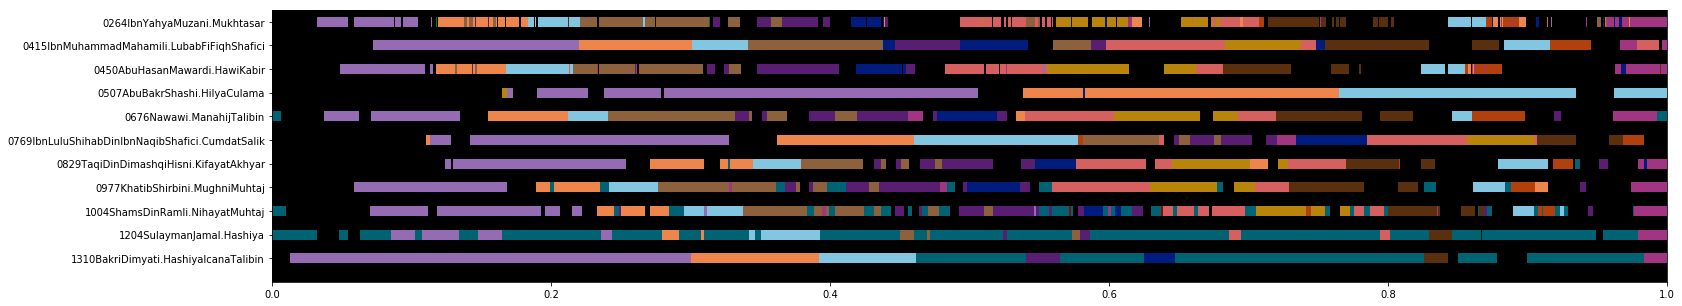

شيعي


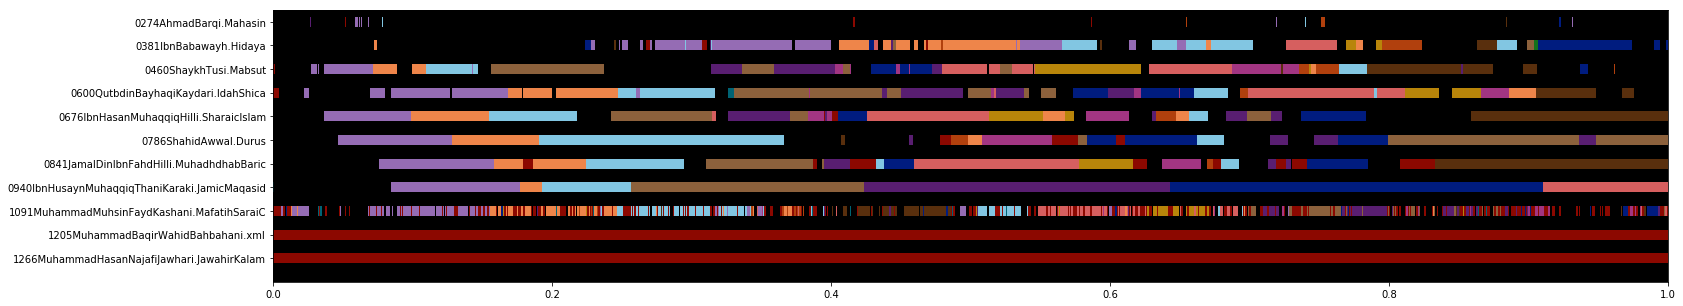

حنبلي


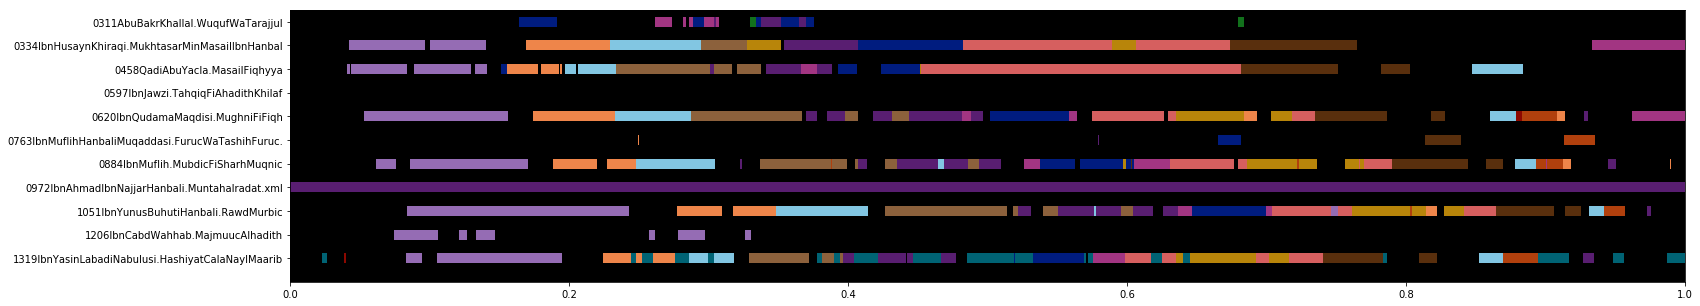

In [77]:
for subj in metadata.BookSUBJ.unique():
    if type(subj)==str:
        print(subj)
        ind_sub = metadata_newind[metadata_newind.BookSUBJ==subj].index.to_frame()
        ind_sub.columns = ['book', 'chapter']
        largest_topics_sub = largest_topics.merge(ind_sub, how='inner')
        plot_bar_per_book(largest_topics_sub, 'perc0', 'perc1', largest_topics_sub.book.unique(), topic_names, legend=False)

In [78]:
def plot_bars_per_topic(df, topic_names, col1, col2='ChapterLength', aggfunc=sum, reshape_col1=False):
    plt.figure(figsize=(15,10))
    ax = plt.gca()
    values = df.groupby([col1, 'topic'])[col2].apply(aggfunc).sort_values()
    values = values.unstack().fillna(0)
    sorted_index = values.sum(axis=1).sort_values(ascending=False).index
    values = values.loc[sorted_index,:]
    ind0 = values.index
    ind1 = values.columns
    x = np.arange(len(ind0))
    last_y = np.repeat(0, len(ind0))
    for t in ind1:
        y = values[t]
        topic_name = topic_names[int(t)]
        if topic_name != 'noise':
            ax.bar(x, y, bottom=last_y, color=color_dict[topic_name],
                    label=bidi.algorithm.get_display(arabic_reshaper.reshape(topic_names[int(t)])))
            last_y = last_y+y
    if reshape_col1:
        xlabels = [bidi.algorithm.get_display(arabic_reshaper.reshape(l)) for l in ind0]
    else:
        xlabels = ind0
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=90)
    plt.legend()
    plt.show()

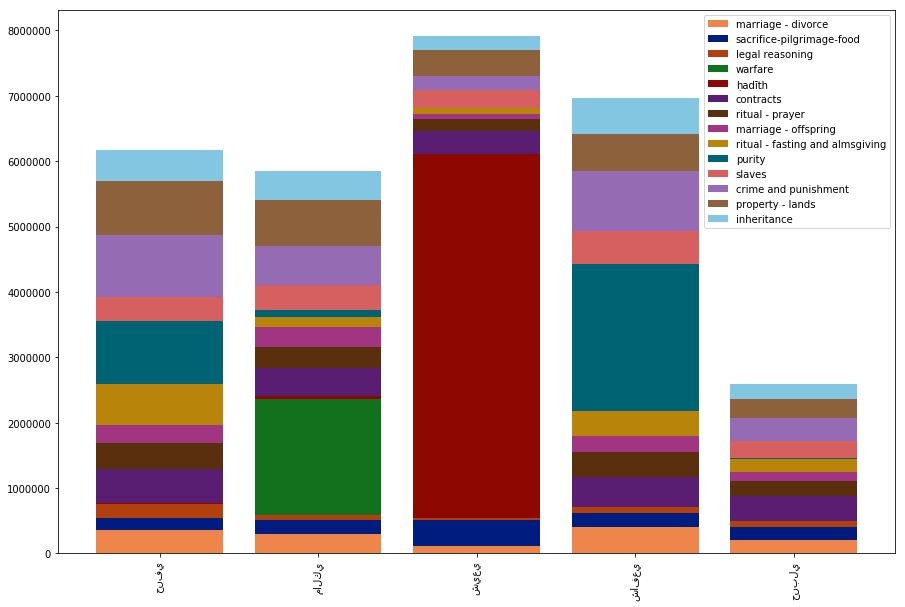

In [79]:
# Here we see the total number of tokens per topic
plot_bars_per_topic(metadata_newind, topic_names, 'BookSUBJ')

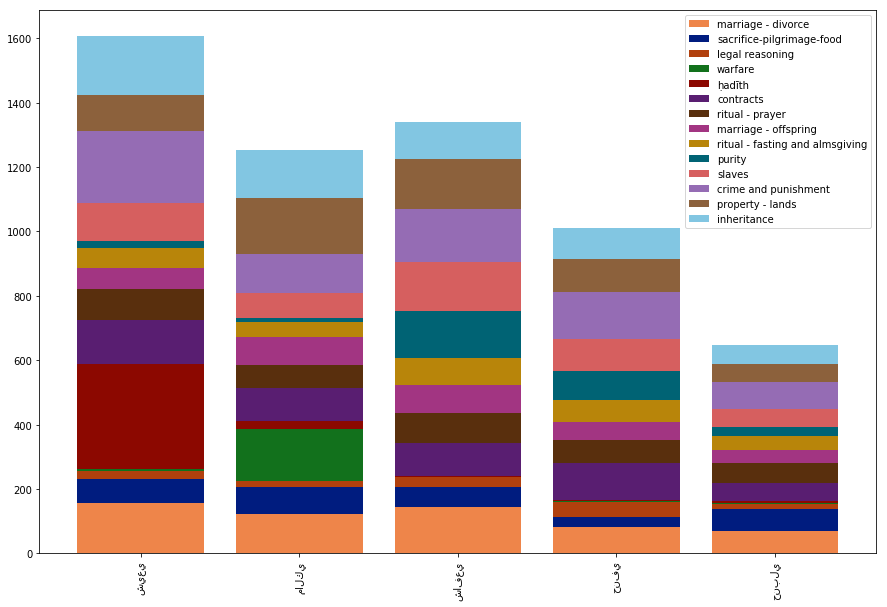

In [80]:
# Here we see only the number of chapters
plot_bars_per_topic(metadata_newind, topic_names, 'BookSUBJ', aggfunc=len)

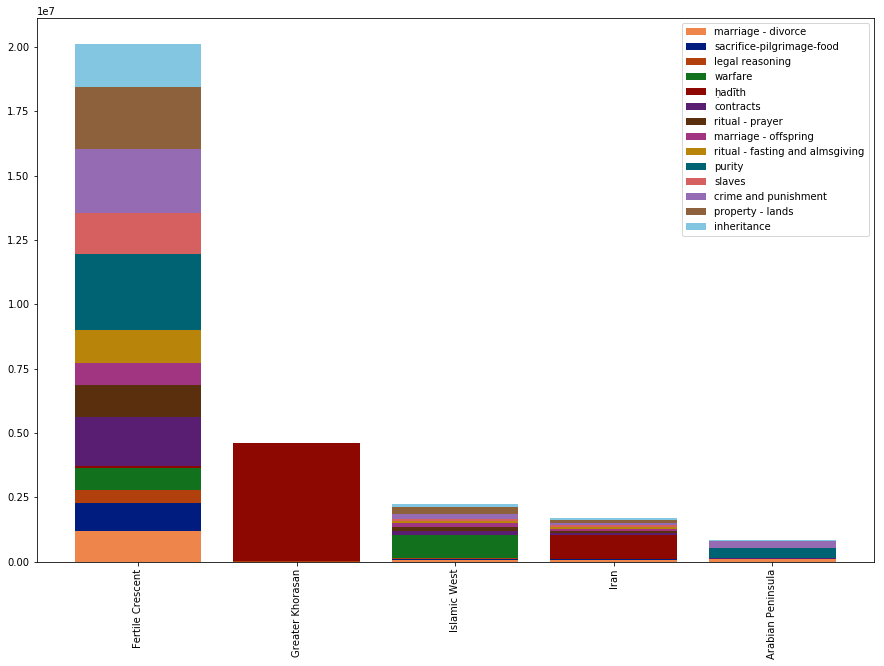

In [81]:
plot_bars_per_topic(metadata_newind, topic_names, 'Author_Geographical_Area')

In [82]:
metadata_newind.columns

Index(['All_tokens_per-century', 'AuthorAKA', 'AuthorBORNC', 'AuthorBORNH',
       'AuthorDIEDC', 'AuthorDIEDH', 'AuthorNAME', 'Author_Geographical_Area',
       'BookSUBJ', 'BookTITLE', 'BookURI', 'BookVOLS', 'Century',
       'ChapterTitle', 'Number_of_tokens', 'Tagging', 'VolumeTitle',
       'ChapterLength', 'topic', 'topic_name'],
      dtype='object')

In [83]:
pd.DataFrame([topic_name], index=[t], columns=['label'])

,label
19,purity


In [84]:
def style_color(df, color):
    st = 'background-color: {}'.format(color)
    return df.style.apply(lambda r: [st]*len(r))

# Print the most common titles per topic
for t, topic_name in enumerate(topic_names):
    #if topic_name != 'noise':
    meta_sub = metadata_newind[metadata_newind['topic_name']==topic_name]
    color = matplotlib.colors.to_hex(color_dict[topic_name])
    #print(t, topic_name)
    display(style_color(pd.DataFrame([topic_name], index=[t], columns=['label']), color=color))
    print("Volumes:")
    for v in meta_sub.VolumeTitle.value_counts().head(10).index:
        print(v)
    print("\nChapters:")
    for c in meta_sub.ChapterTitle.value_counts().head(10).index:
        print(c)
    print('\n')

,label
0,noise


Volumes:
-
كتاب باب إغماض الميت
كتاب الطهارة
كتاب
كتاب الدعوى
كتاب الحدود
كتاب الشهادات
كتاب مفاتيح الصلاة
كتاب الوكالة
كتاب الكفالة

Chapters:
-
باب
فصل
باب ما جاء في
باب التيمم
باب ما
باب المسح على الخفين
باب السبق باب السبق وللبخاري عن ابن عمر قال أجرى النبي صلى الله عليه وسلم
باب القرض باب القرض وعن عبد الله بن أبي ربيعة أن النبي صلى الله عليه وسلم
باب الرجوع عن الشهادة




,label
1,marriage - divorce


Volumes:
كتاب الزكاة
-
كتاب باب إغماض الميت
كتاب الصيام
كتاب مفاتيح الصلاة فلا نعيده في الصحيح هما واحد إذا قصرت أفطرت إذا أفطرت قصرت
كتاب الجمعة وغيرها من أمرها
كتاب الصوم
كتاب مفاتيح الزكاة
كتاب الزكاة فصل في حقيقة الزكاة وما يحب فيها وبيان شروطها
كتابالزكاة

Chapters:
-
باب صوم التطوع
باب زكاة الفطر
باب الاعتكاف
باب صدقة الفطر
باب
باب قسم الصدقات
باب زكاة الثمار
باب صلاة الاستسقاء
باب زكاة العروض




,label
2,noise


Volumes:
-
كتاب باب إغماض الميت
كتاب الطهارة
كتاب
كتاب الدعوى
كتاب الحدود
كتاب الشهادات
كتاب مفاتيح الصلاة
كتاب الوكالة
كتاب الكفالة

Chapters:
-
باب
فصل
باب ما جاء في
باب التيمم
باب ما
باب المسح على الخفين
باب السبق باب السبق وللبخاري عن ابن عمر قال أجرى النبي صلى الله عليه وسلم
باب القرض باب القرض وعن عبد الله بن أبي ربيعة أن النبي صلى الله عليه وسلم
باب الرجوع عن الشهادة




,label
3,slaves


Volumes:
كتاب النكاح
كتاب مفاتيح المناكح المواليد
كتاب باب إغماض الميت
كتاب الوكالة
كتابالنكاح
كتاب الرضاع
كتاب الصداق
كتاب الطلاق
كتاب النفقات
-

Chapters:
-
باب الاستبراء
باب الحضانة
باب الخيار والاعفاف ونكاح العبد وجد أحد زوجين
باب الخيار في النكاح
باب
باب المتعة
باب الرضاع
باب النفقة
باب المحرمات في النكاح




,label
4,crime and punishment


Volumes:
كتاب الصلاة
-
كتاب مفاتيح الصلاة
كتابالصلاة
كتاب الصلاة الصلاة في اللغة هي الدعاء لقوله تعالى وصل عليهم إن
كتاب الصلاة الصلاة في الشرع أفعال مخصوصة من قيام وركوع وسجود مع أذكار مخصوصة ولها مقدمات يجب على المكلف بها معرفتها وهي الطهارة وأعداد الصلاة والوقت والقبلة واللباس والمكان والمسجد وستر العورة وتطهير الثوب والبدن والمندوب من المقدمة الأذان والإقامة الفصل الأول الصلاة ضربان مفروض ومسنون فالمفروض قسمان ما يجب بإطلاق الشرع وما يجب عند سبب إما من جهة المكلف كصلاة النذر وإما غير متعلق به كصلاة الكسوف والعيدين وما يجب بالإطلاق فالصلوات الخمس وشرائط وجوبها البلوغ وكمال العقل لأن غير البالغ لا تجب الصلاة عليه وإنما يؤخذ به بعد ست سنين تمرينا وتعليما وغير كامل العقل لا تجب الصلاة عليه وإن بلغ ومن شرط وجوبها على المرأة أن تكون طاهرا من حيض الفصل الثاني الصلاة قسمان سفري وحضري ففرائض الحضر سبع عشرة ركعة الظهر والعصر والعشاء الآخرة كل واحدة أربع والمغرب ثلاث والفجر ركعتان ونوافل الحضر أربع وثلاثون ثمان للظهر وثمان للعصر وأربع للمغرب وركعتان من جلوس للعشاء الآخرة وإحدى عشرة ركعة صلاة 

,label
5,property - lands


Volumes:
كتاب البيوع
كتاب البيع
كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع
كتاب باب إغماض الميت
كتاب الرهن
كتاب الجمعة وغيرها من أمرها
كتاب البيوع باب
كتاب الشفعة
كتاب البيوع باب ما جاء في بيع
كتابالبيوع

Chapters:
-
باب السلم
باب
باب الرهن
باب الربا
باب الحوالة
باب اختلاف المتبايعين إذا اتفقا على صحة البيع
باب الزيادة في السلف وضبط ما يكال وما يوزن
باب الشفعة
باب الوكالة




,label
6,noise


Volumes:
-
كتاب باب إغماض الميت
كتاب الطهارة
كتاب
كتاب الدعوى
كتاب الحدود
كتاب الشهادات
كتاب مفاتيح الصلاة
كتاب الوكالة
كتاب الكفالة

Chapters:
-
باب
فصل
باب ما جاء في
باب التيمم
باب ما
باب المسح على الخفين
باب السبق باب السبق وللبخاري عن ابن عمر قال أجرى النبي صلى الله عليه وسلم
باب القرض باب القرض وعن عبد الله بن أبي ربيعة أن النبي صلى الله عليه وسلم
باب الرجوع عن الشهادة




,label
7,noise


Volumes:
-
كتاب باب إغماض الميت
كتاب الطهارة
كتاب
كتاب الدعوى
كتاب الحدود
كتاب الشهادات
كتاب مفاتيح الصلاة
كتاب الوكالة
كتاب الكفالة

Chapters:
-
باب
فصل
باب ما جاء في
باب التيمم
باب ما
باب المسح على الخفين
باب السبق باب السبق وللبخاري عن ابن عمر قال أجرى النبي صلى الله عليه وسلم
باب القرض باب القرض وعن عبد الله بن أبي ربيعة أن النبي صلى الله عليه وسلم
باب الرجوع عن الشهادة




,label
8,noise


Volumes:
-
كتاب باب إغماض الميت
كتاب الطهارة
كتاب
كتاب الدعوى
كتاب الحدود
كتاب الشهادات
كتاب مفاتيح الصلاة
كتاب الوكالة
كتاب الكفالة

Chapters:
-
باب
فصل
باب ما جاء في
باب التيمم
باب ما
باب المسح على الخفين
باب السبق باب السبق وللبخاري عن ابن عمر قال أجرى النبي صلى الله عليه وسلم
باب القرض باب القرض وعن عبد الله بن أبي ربيعة أن النبي صلى الله عليه وسلم
باب الرجوع عن الشهادة




,label
9,inheritance


Volumes:
كتاب الحج
كتاب مفاتيح الحج
كتاب المناسك
كتاب الحج باب الغسل للإهلال
-
كتاب مفاتيح المطاعم المشارب
كتاب الحج باب
كتاب باب إغماض الميت
كتاب الزكاة فصل في حقيقة الزكاة وما يحب فيها وبيان شروطها
كتابالحج

Chapters:
-
باب
باب الهدي
الباب الثاني في الاضطرار
باب المواقيت
باب الذكاة
باب الأضحية
باب الإحصار
باب الإحرام
باب الفدية




,label
10,sacrifice-pilgrimage-food


Volumes:
كتاب الفرائض
كتاب الوصايا
كتاب الفرائض والمواريث
-
كتاب باب إغماض الميت
كتاب الفرائض والمواريث روي عن النبي صلى الله عليه وآله أنه قال
كتاب العتق
كتاب الوكالة
كتاب العين والدين
كتابالفرائض

Chapters:
-
باب العصبات
باب ميراث الجد
باب ذوي الأرحام
باب الوصية
باب ميراث ولد الملاعنة
باب ميراث
باب الموصى إليه
الفصل الثاني لا يجوز التصرف لولي الطفل مع شيء من ملكه إلا للغبطة والمصلحة له أو لحاجة شديدة من الطفل إلى نفقته وكسوته ولا وجه له سواه ويجوز له شراؤه ويجوز له أن يتصرف في ماله بالتجارة وشرى العقار نظرا له وإذا بلغ الصبي وقد باع وليه شيئا من أملاكه فادعى أنه باعه بلا حاجة ولا غبطة فالقول قول الولي إن كان أباه أو جده وقول الصبي إن كان الولي وصيا أو أمينا وعليهما البينة ويقبل قول الأب أو الجد له أنه أنفق على الصبي أو على عقاره بلا بينة ولا يقبل من الوصي إلا ببينة ويستحق الولي أجرة مثله في القيام بأمر اليتيم ومتى تصرف الولي على وجه لا حظ لليتيم فيه بطل ولم يستحق أجرا ولا يصح بيع الصبي وشراؤه إلا بعد أن يبلغ عشر سنين فصاعدا ويكون رشيدا للأب الفقير أن يأخذ من مال الولد الغني نفقته بلا

,label
11,legal reasoning


Volumes:
كتاب الأيمان
-
كتاب باب إغماض الميت
كتاب مفاتيح النذور العهود
كتاب مختصر الجامع من كتاب الجزية وما دخل فيه من اختلاف الأحاديث
كتاب النذور
كتاب الإعتاق هو إثبات القوة الشرعية للمملوك ويصح من حر مكلف لمملوكه أنت حر أو بما يعبر به عن البدن وعتيق ومعتق ومحرر وحررتك وأعتقتك نواه أو لا وب لا ملك ولا رق ولا سبيل لي عليك إن نوى وإلا لا وهذا ابني أو أبي أو أمي وهذا مولاي أو يا مولاي أو يا حر أو يا عتيق لا يا ابني ويا أخي ولا سلطان لي عليك وألفاظ الطلاق وأنت مثل الحر وعتق بما أنت إلا حر وبملك قريب محرم ولو كان المالك صبيا أو مجنونا لوجه الله وللشيطان وللصنم وبكره وسكر وإن أضافه إلى ملك أو شرط صح ولو حرر حاملا عتقا وإن حرره عتق فقط والولد يتبع الأم في الملك والحرية والرق والتدبير والاستيلاد والكتابة وولد الأمة من سيدها حر باب العبد يعتق بعضه من أعتق بعض عبده لم يعتق كله وسعى له فيما بقي وهو كالمكاتب وإن أعتق نصيبه فلشريكه أن يحرر أو يستسعي والولاء لهما أو يضمن لو موسرا ويرجع به على العبد والولاء له ولو شهد كل بعتق نصيب صاحبه سعى لهما ولو علق أحدهما عتقه بفعل فلان غدا وعكس الآخر ومضى ولم 

,label
12,warfare


Volumes:
كتاب
كتاب الصرف في
كتاب التفليس
كتاب العارية في ضمان
كتاب العدة بابفي عدة المطلقات من ذوات
-
كتاب الوديعة باب في الوديعة وما يكون من دفعها وإيداعها وما لا يكون تعديا وهل له
كتاب الوكالات والبضائع بابفيمن وكل على طلب عبد أو ربع ولم
كتاب الجهاد باب الترغيب في الجهاد حدثني
كتاب الإكراه القول في الإكراه على القول وعلى الفعل من كتاب ابن سحنون ومن

Chapters:
بابفي
-
بابجامع لمسائل مختلفة في
بابفي الإكراه على التخيير قال ابن سحنون
بابفي حيازة الأحباس قال أبو محمد ما ذكرنا في هذا الباب وما
الباب الثاني في الحكام
بابفي انفاق الأب على
بابفي الصلح يقع بما لا يجوز به عقد البيع هل يرد ومن صالح من
بابآخر من رد
بابفي الرجل يموت فتنفذ وصيته ويقسم




,label
13,ḥadīth


Volumes:
كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع
كتاب مفاتيح الصلاة
كتاب مفاتيح المناكح المواليد
كتاب مفاتيح الحج
-
كتاب مفاتيح الحسبة الحدود
كتاب مفاتيح الزكاة
كتاب مفاتيح العطايا المروات
كتاب مفاتيح الصلاة فلا نعيده في الصحيح هما واحد إذا قصرت أفطرت إذا أفطرت قصرت
كتاب مفاتيح القضاء الشهادات

Chapters:
-
مفتاح اعتبار التواري عن الجدران عدمه
مفتاح معنى الارتداد
مفتاح لو كان عند شخص مال الغير
مفتاح ما يستحب في الخروج إلى منى
فصل وأما حكم السرقة
مفتاح الفرائض الكفائية
مفتاح حكم شهادة المملوك
مفتاح موارد الشفعة أحكامها
مفتاح الوقف على غير المنحصر




,label
14,contracts


Volumes:
كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع
كتاب المزارعة
كتاب المضاربة
كتاب الإجارة
كتاب الغصب
كتاب الإجارات
كتاب الشركة
كتاب البيع
كتاب باب إغماض الميت
كتاب العارية

Chapters:
-
باب الضمان
باب الضمان شرط الضامن الرشد
باب القسمة
باب المساقاة
باب الصلح
الفصل العشرون يكره حبس الأقوات الستة الحنطة والشعير والتمر والزبيب والسمن والملح إذا لم يوجد ذلك إلا عند إنسان بعينه وأضر ذلك بالمسلمين ويجب إذا على السلطان إجبار صاحبه على بيعه من غير تعيين سعر ولا يمكنه الإمام من حبسه في حال الغلاء وقلة الأطعمة أكثر من ثلاثة أيام وفي الرخص والسعة أكثر من أربعين يوما ولا يكره حبس ما عدا ما ذكرناه لا في الرخص ولا في الغلاء ولا حبسها مع وجودها ومن كان عنده فاضل طعام في القحط وبالناس ضرورة وجب عليه بذله كتاب إحياء الموات فصل الموات من الأرض للإمام القائم مقام النبي صلىاللهعليهوآلهوسلم خاصة لا يجوز لأحد أن يتصرف فيه إلا بإذنه ومن أحيى أرضا بإذن مالكها أو سبق إلى التحجير عليها كان أحق بالتصرف فيها من غيره وليس للمالك أخذها منه إلا أن لا يقوم بعمارتها ولا يقبل عليها ما يقبل غيره ولا يجوز لأحد أن

,label
15,ritual - prayer


Volumes:
كتاب مفاتيح الحسبة الحدود
كتاب الجنايات
كتاب الديات
كتاب باب إغماض الميت
كتاب الحدود
كتاب العقول
كتاب العقول باب ذكر العقول
تاب الديات
كتاب الجراح
-

Chapters:
-
باب القسامة
باب
باب قاطع الطريق
باب كيفية القصاص
باب العفو عن القصاص
باب موجبات الدية
باب موجبات الدية والعاقلة والكفارة
بابتداء الجناية ديتين وما
باب مايوجب القصاص فيما دون النفس




,label
16,marriage - offspring


Volumes:
كتاب المكاتب
كتاب العتق
كتاب باب إغماض الميت
كتاب العتاق
كتاب الأقضية واليمين مع الشاهد وما دخل فيه من اختلاف الحديث وغير
كتاب المكاتب الكتابة مشتقة من الكتب فالكتب هو الضم والجمع يقال كتبت
كتاب المكاتب باب القضاء في المكاتب وحدثني عن مالك عن
كتاب الإعتاق
-
كتاب الولاء

Chapters:
-
باب التدبير
باب القسمة
باب
بابفيه ذكر شراء كسور السؤال وفى الزبل يجتمع فى أرض حبس هل يعمل به طوب من
باب الكتابة
الباب الثامن والعشرون في الحلى
فصل وأما شرائط الركن فأنواع
باب الولاء
باب في ولد المكاتبة




,label
17,noise


Volumes:
-
كتاب باب إغماض الميت
كتاب الطهارة
كتاب
كتاب الدعوى
كتاب الحدود
كتاب الشهادات
كتاب مفاتيح الصلاة
كتاب الوكالة
كتاب الكفالة

Chapters:
-
باب
فصل
باب ما جاء في
باب التيمم
باب ما
باب المسح على الخفين
باب السبق باب السبق وللبخاري عن ابن عمر قال أجرى النبي صلى الله عليه وسلم
باب القرض باب القرض وعن عبد الله بن أبي ربيعة أن النبي صلى الله عليه وسلم
باب الرجوع عن الشهادة




,label
18,ritual - fasting and almsgiving


Volumes:
كتاب الطلاق
كتاب مفاتيح المناكح المواليد
كتاب باب إغماض الميت
كتابالطلاق
كتاب العدد
كتاب الخلع سمى الله تعالى الخلع في كتابه افتداء فقال فلا جناح
-
كتاب الظهار
كتاب الخلع
كتاب الطلاق باب ما جاء في البتة بسم الله الرحمن الرحيم كتاب

Chapters:
-
باب الخيار في النكاح
باب الرجعة
باب الخلع
باب الشك في الطلاق
باب الإيلاء
باب العدة
بابه فقال من هذه فقالت
باب الاستبراء
باب الخيار والاعفاف ونكاح العبد وجد أحد زوجين




,label
19,purity


Volumes:
كتاب الصلاة
كتاب الحج
-
كتاب النكاح
كتاب الرهن
كتاب الوصايا
كتاب الزكاة
كتاب الطلاق
كتاب القضاء
كتاب الوقف

Chapters:
-
باب البغاة
بابا عن غير مميز كطير وعبد مجنون وهذا أعم وأولى من قوله ولو فتح قفصا
باب موت المكاتب وعجزه وموت المولى
باب دعوى الدم
باب ما يبطلها
باب الضمان
فصلفي بيان النظر على الوقف وشرطه ووظيفة الناظر
باب الاستبراء وغيره
باب أهل الزكاة قوله لا يجوز صرفها إلى غيرهم أي لكن لا




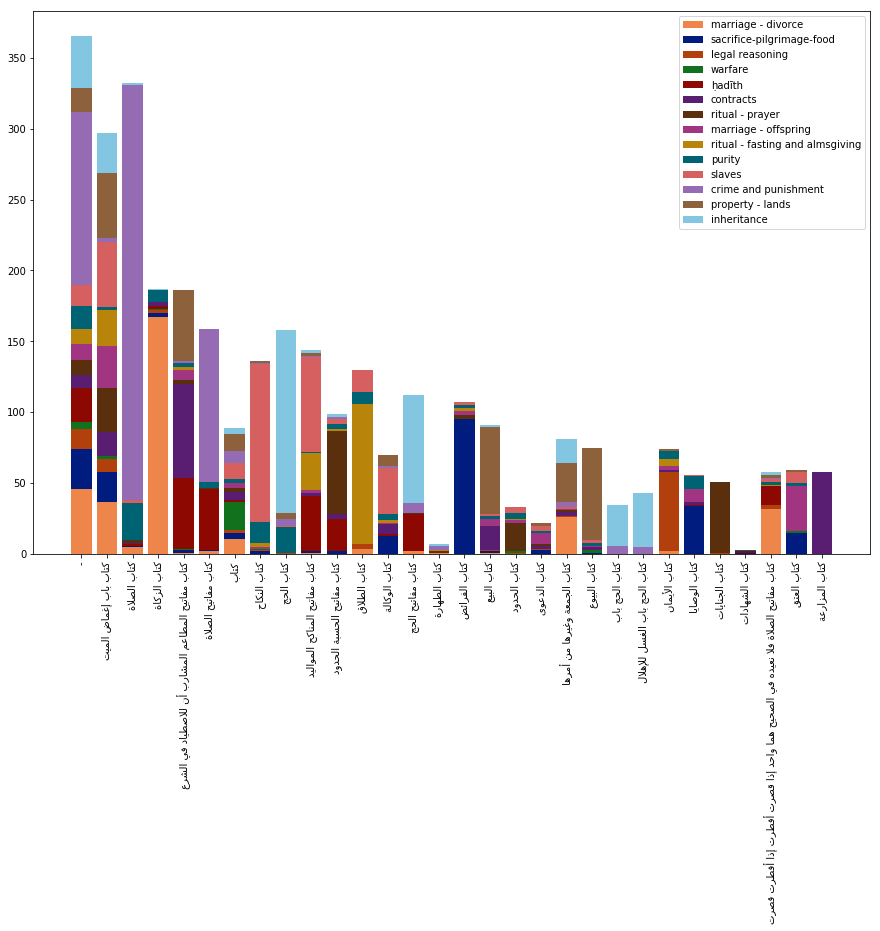

In [85]:
# The 30 most common volume names
voltitles = metadata_newind['VolumeTitle'].value_counts().head(30).index
meta_sub = metadata_newind[metadata_newind.VolumeTitle.isin(voltitles)]
plot_bars_per_topic(meta_sub, topic_names, 'VolumeTitle', reshape_col1=True, aggfunc=len)

0 باب
1 فصل
2 باب الضمان
3 باب ما جاء في
4 باب القسمة
5 باب ما
6 بابفي
7 باب صلاة الاستسقاء
8 باب البغاة
9 باب الضمان شرط الضامن الرشد
10 الفصل الثاني لا يجوز التصرف لولي الطفل مع شيء من ملكه إلا للغبطة والمصلحة له أو لحاجة شديدة من الطفل إلى نفقته وكسوته ولا وجه له سواه ويجوز له شراؤه ويجوز له أن يتصرف في ماله بالتجارة وشرى العقار نظرا له وإذا بلغ الصبي وقد باع وليه شيئا من أملاكه فادعى أنه باعه بلا حاجة ولا غبطة فالقول قول الولي إن كان أباه أو جده وقول الصبي إن كان الولي وصيا أو أمينا وعليهما البينة ويقبل قول الأب أو الجد له أنه أنفق على الصبي أو على عقاره بلا بينة ولا يقبل من الوصي إلا ببينة ويستحق الولي أجرة مثله في القيام بأمر اليتيم ومتى تصرف الولي على وجه لا حظ لليتيم فيه بطل ولم يستحق أجرا ولا يصح بيع الصبي وشراؤه إلا بعد أن يبلغ عشر سنين فصاعدا ويكون رشيدا للأب الفقير أن يأخذ من مال الولد الغني نفقته بلا إسراف إذا لم ينفق
11 باب التيمم
12 باب الحيض
13 باب الاستبراء
14 باب الخيار في النكاح
15 باب القسامة
16 باب الخيار والاعفاف ونكاح العبد وجد أحد زوجين
17 باب صلاة العيدين
18 با

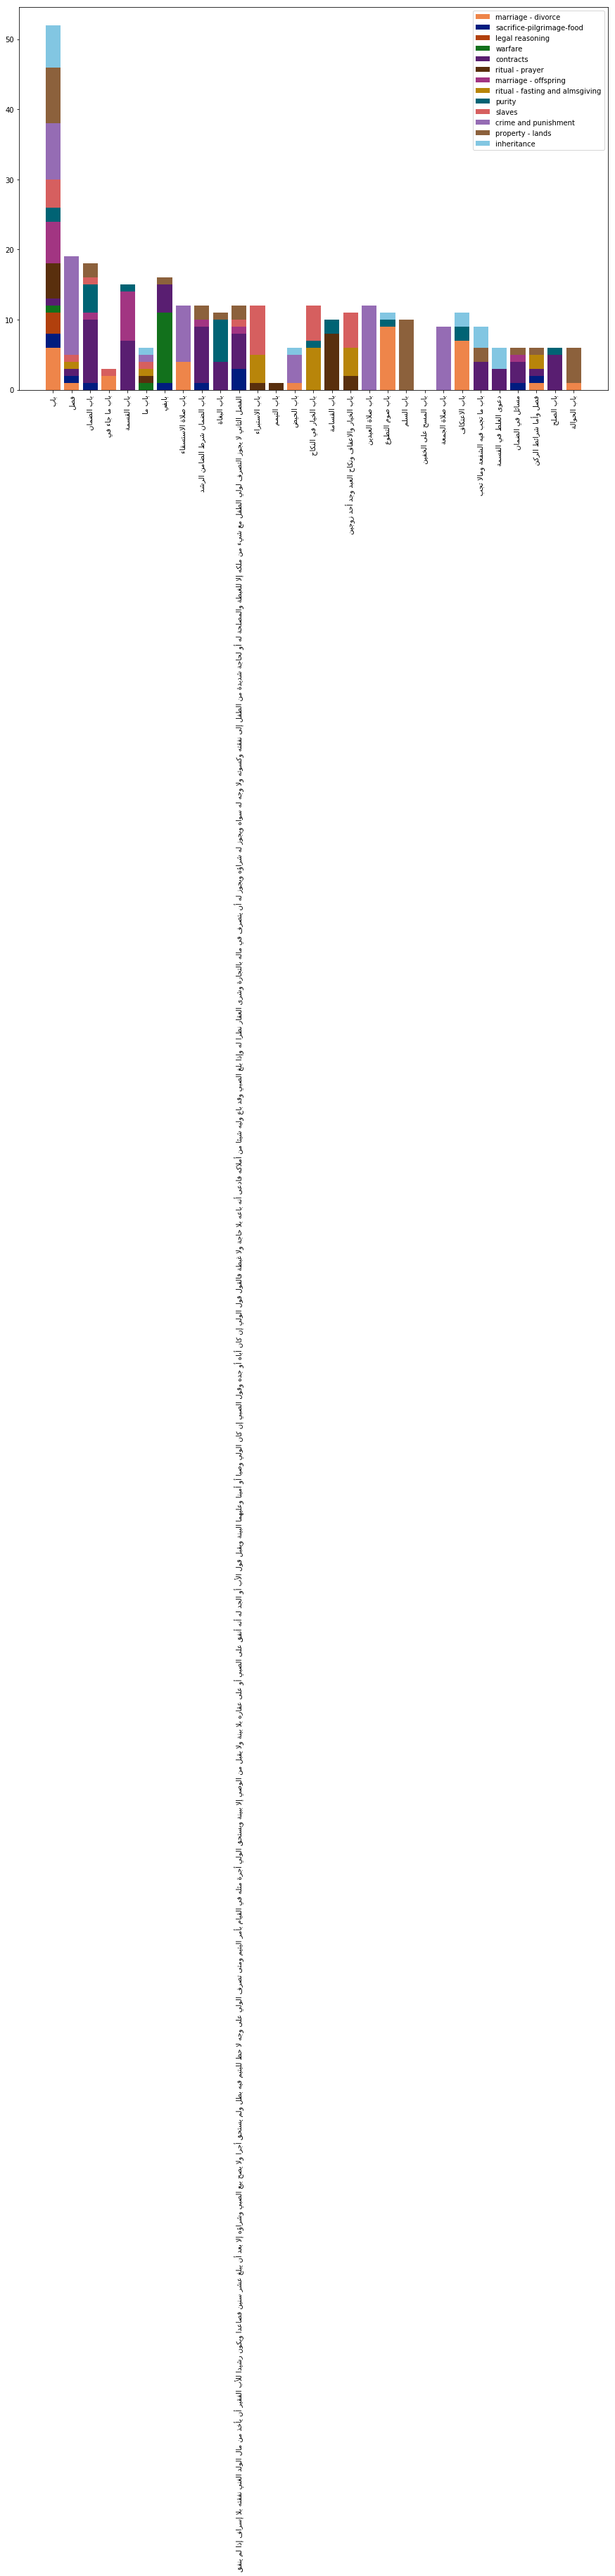

In [86]:
# The 30 most common chapter names
voltitles = metadata_newind['ChapterTitle'].value_counts().head(30)[1:].index
for i, v in enumerate(voltitles):
    print(i, v)
meta_sub = metadata_newind[metadata_newind.ChapterTitle.isin(voltitles)]
plot_bars_per_topic(meta_sub, topic_names, 'ChapterTitle', reshape_col1=True, aggfunc=len)